In [74]:
import pandas as pd
import numpy as np
data = pd.read_csv("spambase/spambase.data")

# Problem 1

## Part A

In [56]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)
spam = train[train.columns[-1]].sum()
total = len(train)
spam/total

0.39507246376811594

In [57]:
from sklearn.linear_model import LogisticRegression
X = train.drop(train.columns[-1], axis=1)
y = train[train.columns[-1]]
model = LogisticRegression(random_state=0).fit(X, y)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
y_true = test[test.columns[-1]]
X_test = test.drop(train.columns[-1], axis=1)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

In [59]:
tn, fp, fn, tp = cm.ravel()
print("True Negative:", tn, "False Positives:", fp, "False Negatives:", fn, "True Positives:", tp)

True Negative: 674 False Positives: 27 False Negatives: 53 True Positives: 396


In [60]:
accuracy = model.score(X_test, y_true)
error = 1 - accuracy
print("Accuracy:", accuracy, "Error:", error)

Accuracy: 0.9304347826086956 Error: 0.06956521739130439


In [61]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision, "Recall:", recall, "F1:", f1)

Precision: 0.9361702127659575 Recall: 0.8819599109131403 F1: 0.908256880733945


## Part B

In [62]:
model.coef_

array([[-4.85594010e-01, -1.33186618e-01,  1.00604507e-01,
         6.96567298e-01,  5.62730732e-01,  5.49503610e-01,
         1.79388049e+00,  5.43699570e-01,  9.25750300e-01,
         6.11962106e-02, -3.24570378e-02, -1.59903414e-01,
        -2.45298798e-02,  6.00130454e-02,  8.52317729e-01,
         1.03212451e+00,  1.02094450e+00,  8.87233860e-02,
         9.11155292e-02,  1.13057371e+00,  2.75840706e-01,
         2.04547662e-01,  1.99418001e+00,  4.02627063e-01,
        -1.61014494e+00, -8.54490146e-01, -2.87161087e+00,
         3.62716688e-01, -9.10230244e-01, -1.01078729e+00,
        -6.97162654e-01, -3.06344599e-02, -9.18957370e-01,
        -1.74908376e-01, -1.01990436e+00,  6.65939032e-01,
        -8.03972383e-02, -5.26369670e-03, -8.92460121e-01,
        -7.08779508e-01, -1.28418887e+00, -1.76240521e+00,
        -6.61883850e-01, -1.48621566e+00, -5.48793419e-01,
        -1.22465765e+00, -4.42723297e-01, -1.14095384e+00,
        -9.90842640e-01, -1.32272924e-01, -4.08372442e-0

The columns that have the largest contributions are char_freq_$, word_freq_remove, word_freq_000, word_freq_george. 

## Part C

In [63]:
from sklearn.metrics import accuracy_score
probs = model.predict_proba(X_test)
thresholds = [.1 * x for x in range(1,10)]
accuracy = []
for t in thresholds:
    preds = np.where(model.predict_proba(X_test)[:,1] > t, 1, 0)
    accuracy.append(accuracy_score(y_true, preds))
for i in range(len(thresholds)):
    print("T:", thresholds[i], "Accuracy:", accuracy[i])

T: 0.1 Accuracy: 0.8252173913043478
T: 0.2 Accuracy: 0.9078260869565218
T: 0.30000000000000004 Accuracy: 0.9321739130434783
T: 0.4 Accuracy: 0.9347826086956522
T: 0.5 Accuracy: 0.9304347826086956
T: 0.6000000000000001 Accuracy: 0.9165217391304348
T: 0.7000000000000001 Accuracy: 0.9034782608695652
T: 0.8 Accuracy: 0.871304347826087
T: 0.9 Accuracy: 0.8295652173913044


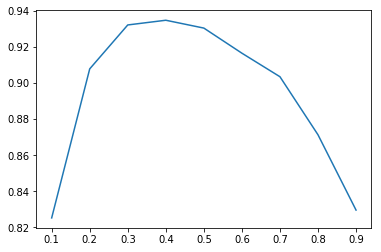

In [64]:
import matplotlib.pyplot as plt
plt.plot(thresholds, accuracy)
plt.show()

# Problem 2

## Part A

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
ks = [i for i in range(2,15)]
accuracy = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    accuracy.append(knn.score(X_test, y_true))
for i in range(len(ks)):
    print("K:", ks[i], "Accuracy:", accuracy[i], "Error:",1-accuracy[i])


K: 2 Accuracy: 0.7895652173913044 Error: 0.21043478260869564
K: 3 Accuracy: 0.7973913043478261 Error: 0.20260869565217388
K: 4 Accuracy: 0.7947826086956522 Error: 0.2052173913043478
K: 5 Accuracy: 0.8 Error: 0.19999999999999996
K: 6 Accuracy: 0.7843478260869565 Error: 0.21565217391304348
K: 7 Accuracy: 0.7965217391304348 Error: 0.20347826086956522
K: 8 Accuracy: 0.7939130434782609 Error: 0.20608695652173914
K: 9 Accuracy: 0.7878260869565218 Error: 0.2121739130434782
K: 10 Accuracy: 0.788695652173913 Error: 0.21130434782608698
K: 11 Accuracy: 0.7878260869565218 Error: 0.2121739130434782
K: 12 Accuracy: 0.7843478260869565 Error: 0.21565217391304348
K: 13 Accuracy: 0.7808695652173913 Error: 0.21913043478260874
K: 14 Accuracy: 0.7834782608695652 Error: 0.21652173913043482


## Part B

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
lda = LinearDiscriminantAnalysis()
decisionTree = DecisionTreeClassifier(random_state=0)
knn.fit(X,y)
lda.fit(X,y)
decisionTree.fit(X,y)
accuracyLR = model.score(X_test, y_true)
accuracyLDA = lda.score(X_test, y_true)
accuracyKnn = knn.score(X_test, y_true)
accuracyDecision = decisionTree.score(X_test, y_true)
print("Logistic Regression Accuracy:",accuracyLR, "LDA Accuracy:", accuracyLDA, "Knn k=3 Accuracy:", accuracyKnn, "Decision Tree Accuracy", accuracyDecision)
print("Logistic Regression Error", 1 - accuracyLR,"LDA Error:", 1 - accuracyLDA, "Knn k=3 Error:", 1 - accuracyKnn, "Decision Tree Error", 1 - accuracyDecision)

Logistic Regression Accuracy: 0.9304347826086956 LDA Accuracy: 0.8834782608695653 Knn k=3 Accuracy: 0.7973913043478261 Decision Tree Accuracy 0.9078260869565218
Logistic Regression Error 0.06956521739130439 LDA Error: 0.11652173913043473 Knn k=3 Error: 0.20260869565217388 Decision Tree Error 0.09217391304347822


The model that performs the best is the Logistic Regression model and the worst is Knn. I thought larger values of K would help the error of the model, but the knn only got worse as k increased. K=3 was already the best in terms of accuracy on the test set. Decision Tree was close to Logistic Regression and might be better because of its interpretability. 

## Part C

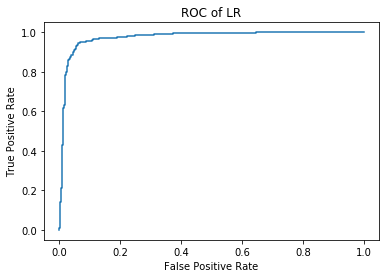

In [67]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_true, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LR')
plt.show()

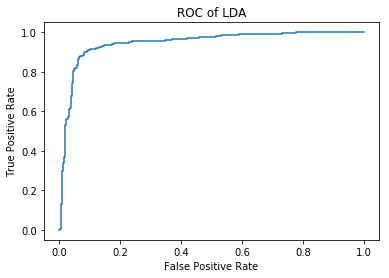

In [68]:
fpr, tpr, _ = roc_curve(y_true, lda.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LDA')
plt.show()

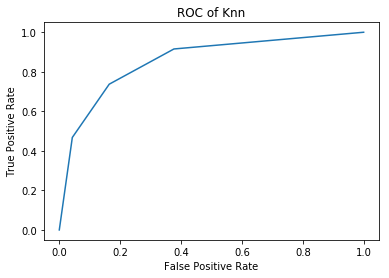

In [69]:
fpr, tpr, _ = roc_curve(y_true, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Knn')
plt.show()

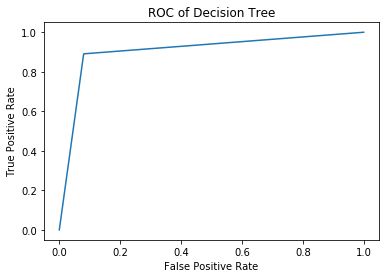

In [70]:
fpr, tpr, _ = roc_curve(y_true, decisionTree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Decision Tree')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
LRAuc = roc_auc_score(y_true, model.predict_proba(X_test)[:,1])
LDAAuc = roc_auc_score(y_true, lda.predict_proba(X_test)[:,1])
KnnAuc = roc_auc_score(y_true, knn.predict_proba(X_test)[:,1])
DecisionTreeAuc = roc_auc_score(y_true, decisionTree.predict_proba(X_test)[:,1])
print("LR AUC:", LRAuc, "LDA AUC:", LDAAuc, "Knn AUC:", KnnAuc, "DecisionTree AUC", DecisionTreeAuc)

LR AUC: 0.9744431276985789 LDA AUC: 0.9458775087450635 Knn AUC: 0.8557024803891354 DecisionTree AUC 0.9053229716377178


# Problem 3

## Part A

In [126]:
import math, operator
def euclidean(x, y):
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return math.sqrt(s)
class knn:
    def __init__(self, k, data):
        self.k = k
        self.data = data
    
    def test(self, x):
        distances = []
        for index, row in X.iterrows():
            distances.append([index, euclidean(row, x)])
        values = []
        distances.sort(key=operator.itemgetter(1))
        values = []
        for i in range(self.k):
            values.append(y[distances[i][0]])
        if sum(values) >= int(self.k/2):
            return 1
        return 0
    def pred(self, test):
        return [self.test(row) for _, row in test.iterrows()]
            
    
myKnn = knn(3, X)
myKnn.test(X.iloc[0])

0

In [127]:
accuracy_score(y_true, myKnn.pred(X_test))

KeyboardInterrupt: 